<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 7.1: Decision Trees

INSTRUCTIONS:

- Read the guides and hints then create the necessary analysis and code to find and answer and conclusion for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.6895
    - **ROC AUC**  = 0.5690
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first stp is to idenfy the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ then **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, labour and iteractive processes. It is part of the process to repeat, review and change when finding a dead-end.

## Scenario: Predicting Heart Disease
Heart disease is one of the main causes of death worldwide, so this is a good start to use data science for good.

To learn how to prevent heart disease is necessary to know how to reliably detect it first.

There is a dataset from a study of heart disease that has been open to the public for many years. The study collects various measurements on patient health and cardiovascular statistics, and of course makes patient identities anonymous.

Data is courtesy of **Yeh, I-Cheng** via the **UCI Machine Learning** repository:
- Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence, "Expert Systems with Applications, 2008, doi:10.1016/j.eswa.2008.07.018.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.

## Actual Question
Choose the **one** question that should be answered.

# Step 2: Find the Data
### Blood Transfusion Service Center DataSet
- **Abstract**: Data taken from the **Blood Transfusion Service Center** in Hsin-Chu City in Taiwan.
- Date Donated: 2008-10-03
- Source:
        Original Owner and Donor: Prof. I-Cheng Yeh 
        Department of Information Management 
        Chung-Hua University, 
        Hsin Chu, Taiwan 30067, R.O.C. 

- Citation Request:
    **NOTE**: Reuse of this database is unlimited with retention of copyright notice for Prof. I-Cheng Yeh and the following published paper: 

        Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence, "Expert Systems with Applications, 2008
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/ml/about.html) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

## Attributes
1.age 

2.sex 

3chest pain type (4 values) 

4.resting blood pressure 

5.serum cholestoral in mg/dl 

6.fasting blood sugar > 120 mg/dl

7.resting electrocardiographic results (values 0,1,2)

8.maximum heart rate achieved 

9.exercise induced angina 

10.oldpeak = ST depression induced by exercise relative to rest 

11.the slope of the peak exercise ST segment 

12.number of major vessels (0-3) colored by flourosopy 

13.thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [2]:
import numpy as np
import pandas as pd

# %matplotlib inline
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
Heart = pd.read_csv('dataset.csv')

In [4]:
Heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
Heart.shape

(303, 14)

In [6]:
df.isnull().sum()

NameError: name 'df' is not defined

# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or expurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

## Data Profile

In [ ]:
import pandas_profiling
pandas_profiling.ProfileReport(Heart)

## Box Plot

In [93]:
Num_Var = Heart.columns.difference(['age', 'sex','target'])
Num_Var

Index(['ca', 'chol', 'cp', 'exang', 'fbs', 'oldpeak', 'restecg', 'slope',
       'thal', 'thalach', 'trestbps'],
      dtype='object')

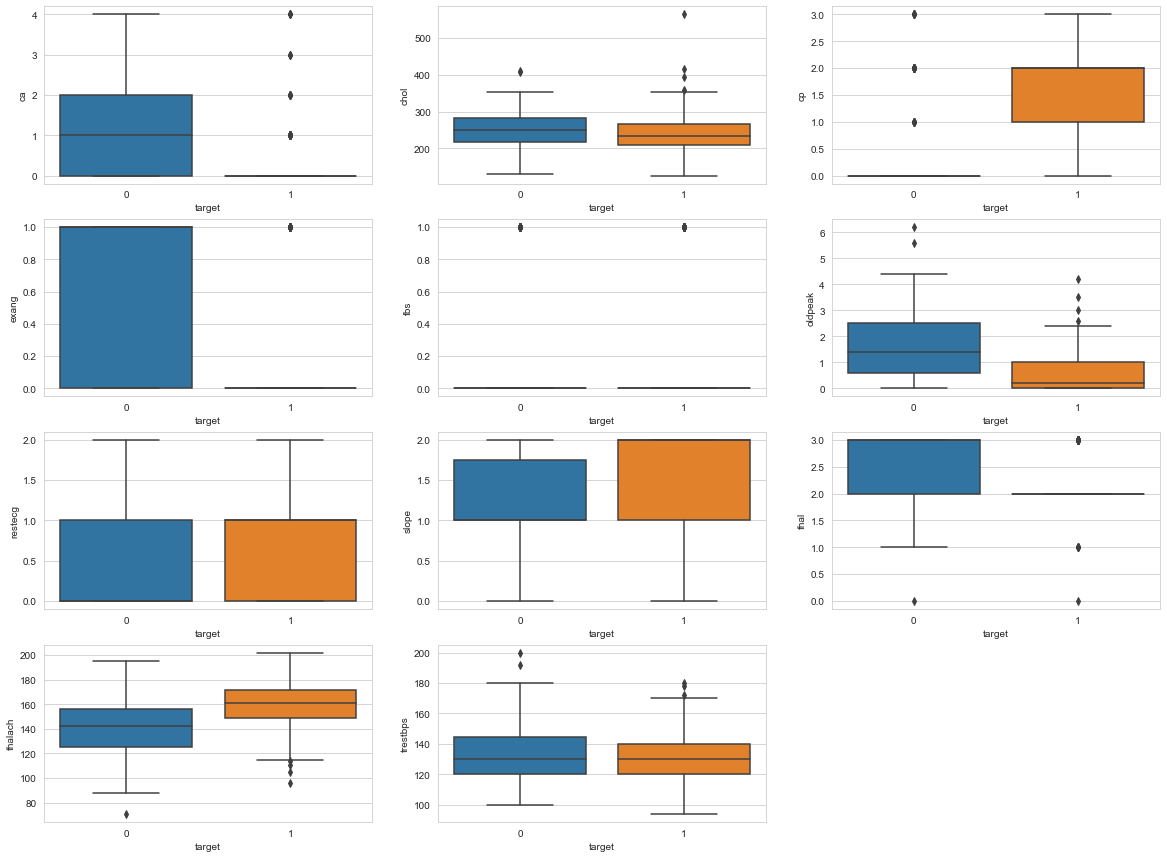

In [94]:
plt.figure(figsize=(20,15))

for i, c in enumerate(Num_Var):
    plt.subplot(4,3, i+1)
    sns.boxplot(x='target', y=c, data=Heart)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe820097250>,
      dtype=object)

<Figure size 1440x1440 with 0 Axes>

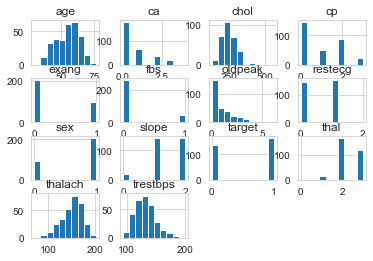

In [95]:
plt.figure(figsize=(20,20))
Heart.hist()

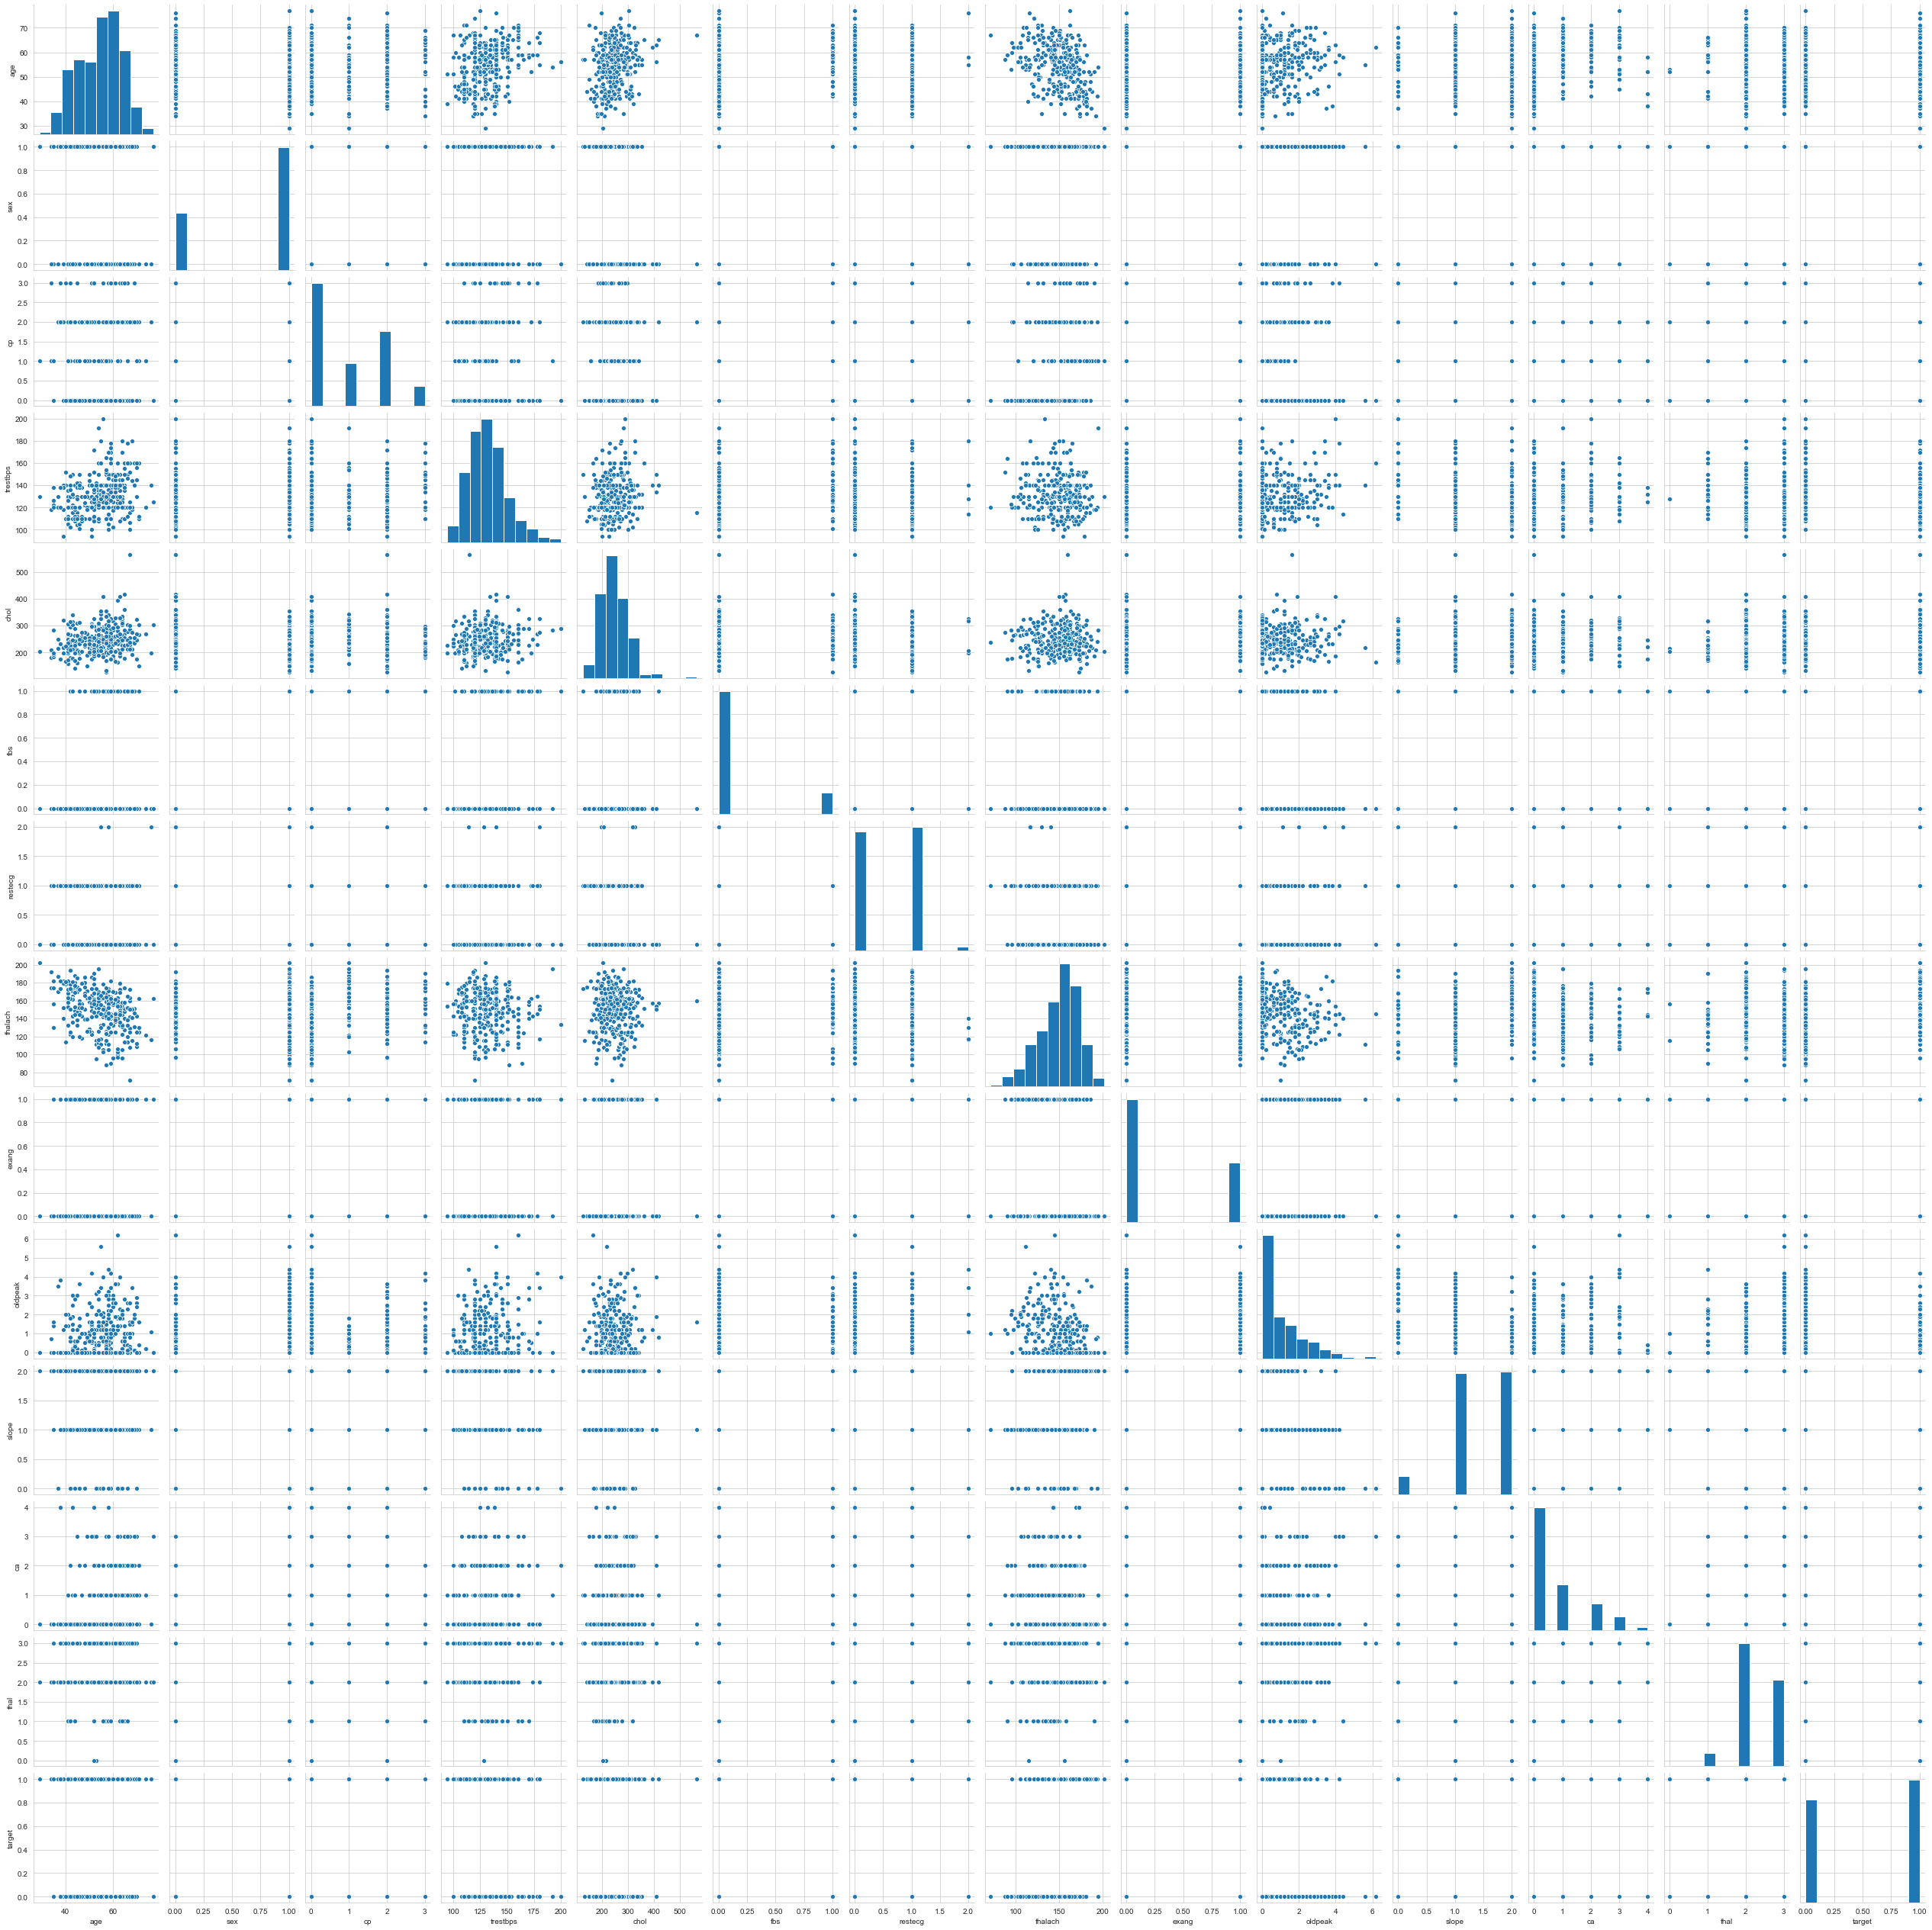

In [96]:
sns.pairplot(Heart)

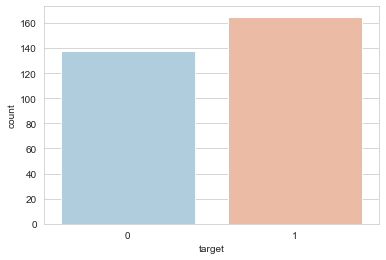

In [97]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=Heart,palette='RdBu_r')

In [98]:
Heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [99]:
Heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [120]:
Heart.dtypes

age         float64
sex           int64
cp            int64
trestbps    float64
chol        float64
fbs           int64
restecg       int64
thalach     float64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

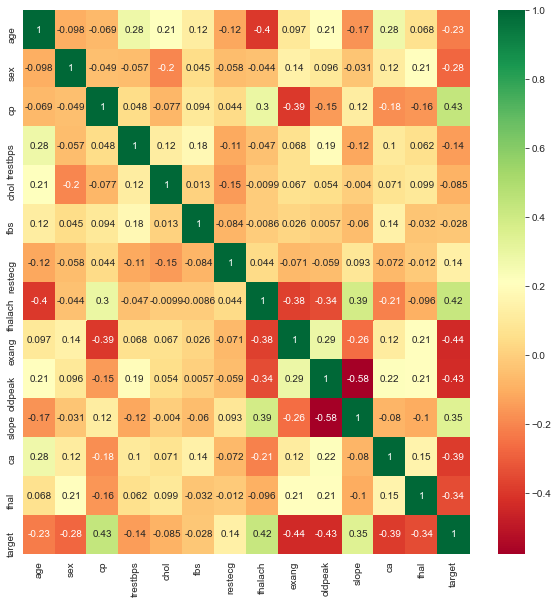

In [121]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Normalisation** (if possible or necessary)
    - **Feature Engeneer** (if useful or necessary)

### Data Processing

After exploring the dataset, I observed that I need to convert some categorical variables into dummy variables and scale all the values before training the Machine Learning models.
First, I'll use the `get_dummies` method to create dummy columns for categorical variables.

In [177]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
                   'exang', 'oldpeak', 'slope', 'ca', 'thal']
Heart[columns_to_scale] = standardScaler.fit_transform(Heart[columns_to_scale])


In [178]:
dataset = pd.get_dummies(Heart, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
- Is there an output variable (label)?
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [ ] Supervised
    - [ ] Unsupervised 
- What type of Modelling is it?
    - [ ] Regression
    - [ ] Classification (binary) 
    - [ ] Classification (multi-class)
    - [ ] Clustering

# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when spliting

In [181]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=.25,
    random_state=42,
    stratify=y)

# Step 8: Define a Model

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

### Optimizing hyper-parameters of a Decision Tree model using Grid Search

In [182]:
y = dataset[['target']]
X = dataset.drop(['target'], axis = 1)
# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X,y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 6, 'min_samples_leaf': 7}
Best score is 0.7424590163934426


In [183]:
def summary_report(actual,prediction, probabilities):
    print('    Accuracy score  : ',accuracy_score(actual,prediction))
    print('    Precision score : ',precision_score(actual,prediction))
    print('    Recall score    : ',recall_score(actual,prediction))
    print('    ROC AUC         : ',roc_auc_score(actual,probabilities))
    
    mat = confusion_matrix(actual,prediction)
    fpr, tpr, _ = roc_curve(actual, probabilities)
    roc_auc = auc(fpr, tpr)
    
    # plot
    fig, ax = plt.subplots(1, 2, figsize=(18, 6))
    fig.subplots_adjust(left=0.02, right=0.98, wspace=0.2)

    # Confusion Matrix
    sns.heatmap(mat.T, square=True, annot=True, fmt='d',
                cbar=False, cmap='Blues', ax=ax[0])

    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('True label')
    ax[0].set_ylabel('Predicted label')


    # ROC
    ax[1].plot(fpr, tpr, color='darkorange', lw=2,
               label='ROC curve (AUC = %0.2f)' % roc_auc)
    ax[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive Rate')
    ax[1].set_title('Receiver Operating Characteristic')
    ax[1].legend(loc='lower right')

    plt.show()

In [184]:
def models(classifier):
    # Train the model using the training sets 
    classifier.fit(X_train, y_train)
    #Predict Score for training data
    y_train_pred = classifier.predict(X_train)
    #Get probability of prediction = 1 for training data
    y_train_proba = classifier.predict_proba(X_train)[:, 1]
    print('\n  Summary report for Training Data \n')
    #call function summary report to display the summary of training actual value and predicted value
    summary_report(y_train,y_train_pred, y_train_proba)
    y_test_pred = classifier.predict(X_test)
    #Get probability of prediction = 1 for test data
    y_test_proba = classifier.predict_proba(X_test)[:, 1]
    print('\n  Summary report for Testing Data \n')
    summary_report(y_test,y_test_pred, y_test_proba)


  Summary report for Training Data 

    Accuracy score  :  0.8722466960352423
    Precision score :  0.8861788617886179
    Recall score    :  0.8790322580645161
    ROC AUC         :  0.956114938928907


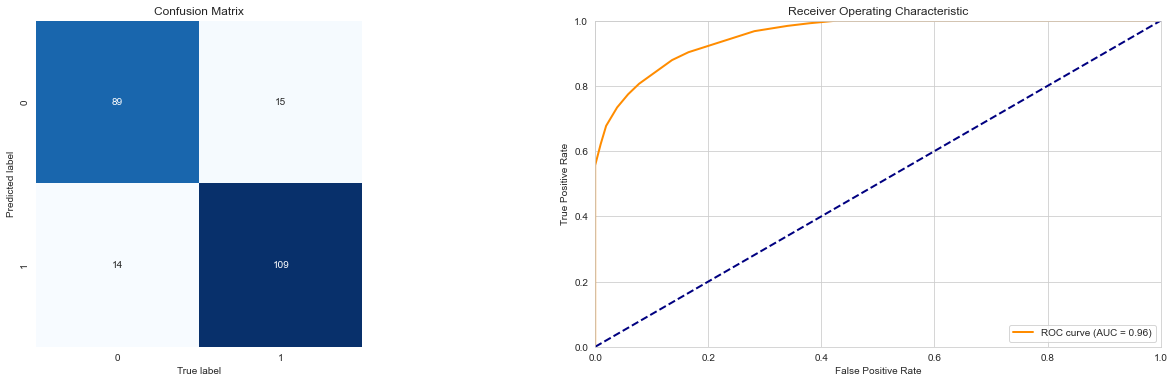


  Summary report for Testing Data 

    Accuracy score  :  0.631578947368421
    Precision score :  0.6666666666666666
    Recall score    :  0.6341463414634146
    ROC AUC         :  0.7226480836236934


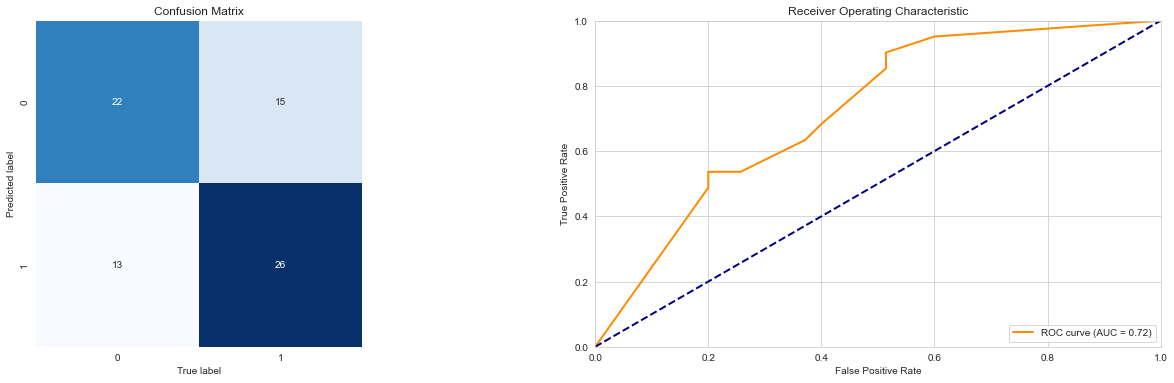

In [185]:
models(classifier = DecisionTreeClassifier(criterion= 'gini', max_depth = None, max_features= 8,min_samples_leaf=5))

# Step 9: Fit the Model

**Model performance after hyper parameter tuning**


  Summary report for Training Data 

    Accuracy score  :  0.9030837004405287
    Precision score :  0.9722222222222222
    Recall score    :  0.8467741935483871
    ROC AUC         :  0.9792123394926402


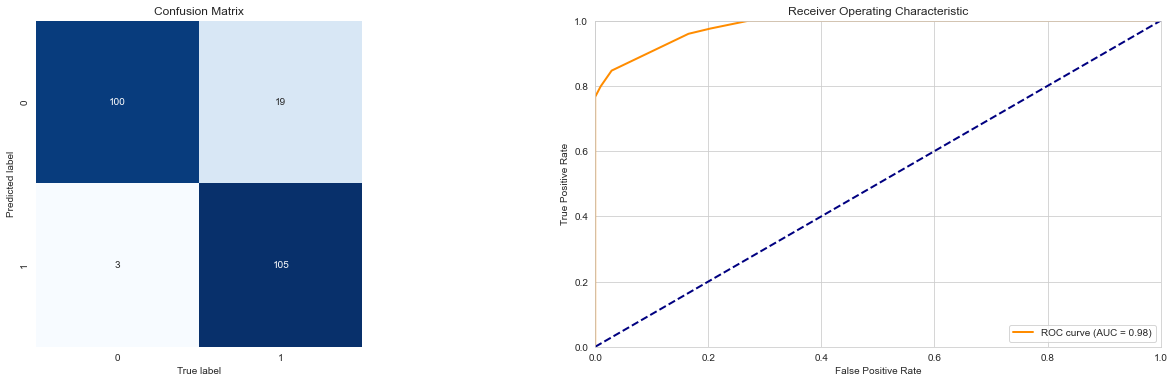


  Summary report for Testing Data 

    Accuracy score  :  0.7368421052631579
    Precision score :  0.7837837837837838
    Recall score    :  0.7073170731707317
    ROC AUC         :  0.8083623693379791


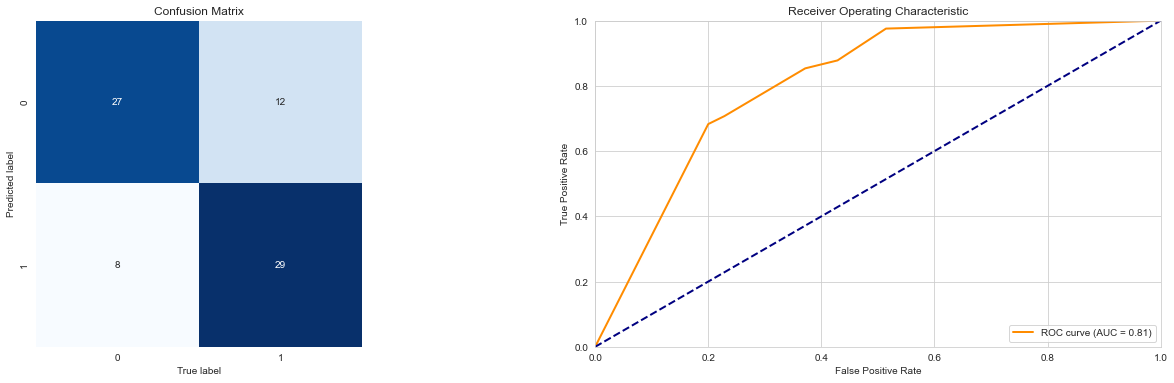

In [186]:
models(classifier = DecisionTreeClassifier(max_depth=10,min_samples_leaf=2,max_features='sqrt',random_state=42))

# Step 10: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- Check for overfitting
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

# Step 11: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

# Step 12: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions

In [193]:
dataset.columns


Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target',
       'sex_-1.4684175155588413', 'sex_0.6810052246069989',
       'cp_-0.9385146340152226', 'cp_0.032031216177993926',
       'cp_1.0025770663712104', 'cp_1.9731229165644266',
       'fbs_-0.41763453479227836', 'fbs_2.394437999475729',
       'restecg_-1.0058318722806538', 'restecg_0.8989622358508343',
       'restecg_2.8037563439823225', 'exang_-0.696630546019236',
       'exang_1.4354811251305468', 'slope_-2.2745786069731913',
       'slope_-0.6491132345371606', 'slope_0.9763521378988699',
       'ca_-0.7144288705953449', 'ca_0.26508220537926824',
       'ca_1.2445932813538814', 'ca_2.224104357328495',
       'ca_3.2036154333031077', 'thal_-3.7848235395783343',
       'thal_-2.148872708633634', 'thal_-0.5129218776889327',
       'thal_1.1230289532557682'],
      dtype='object')

>

>



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



